In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
from tqdm import tqdm_notebook as tqdm
import json
import pandas as pd
import pickle
import os
import h5py
import collections as cl
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
import random
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from deem import deem

In [21]:
param_grid = {'LR_param': {'C':[10**k for k in range(-8, 4, 1)]}, 'scoring': 'roc_auc', 'cv': 3, 'random_state': 42}

with open("genre_map.json", "r") as f: # only consider 10 classes of Openmic dataset
    genre_map = json.load(f)
aligned_genre = list(genre_map)[:-1]

with open("instrument_map.json", "r") as f: # only consider 10 classes of Openmic dataset
    instrument_map = json.load(f)

meta_all = pd.read_csv("irmas_meta_all.csv")

## VGGish

In [22]:
embedding = 'vggish'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid)

A_feature = deb.load_feature(meta_all, 'A')
B_feature = deb.load_feature(meta_all, 'B')

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

100%|██████████| 6705/6705 [00:01<00:00, 4567.59it/s]


(6705, 128) (6705,)


100%|██████████| 6705/6705 [00:01<00:00, 4613.84it/s]


(6705, 128) (6705,)
Train on A, test on A


100%|██████████| 10/10 [01:25<00:00,  8.53s/it]


Train on A, test on B


100%|██████████| 10/10 [01:26<00:00,  8.65s/it]


Train on B, test on B


100%|██████████| 10/10 [01:09<00:00,  6.99s/it]


Train on B, test on A


100%|██████████| 10/10 [01:10<00:00,  7.01s/it]


In [23]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

Train on A, test on A


100%|██████████| 10/10 [01:44<00:00, 10.48s/it]


Train on A, test on B


 80%|████████  | 8/10 [01:33<00:20, 10.07s/it]

In [ ]:
debias_method = '-mlda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/result_' + embedding + debias_method + '.csv')
result_all = deb.result_all

Train on A, test on A


100%|██████████| 10/10 [02:01<00:00, 12.19s/it]


Train on A, test on B


100%|██████████| 10/10 [02:01<00:00, 12.17s/it]


Train on B, test on B


100%|██████████| 10/10 [01:43<00:00, 10.30s/it]


Train on B, test on A


100%|██████████| 10/10 [01:43<00:00, 10.34s/it]


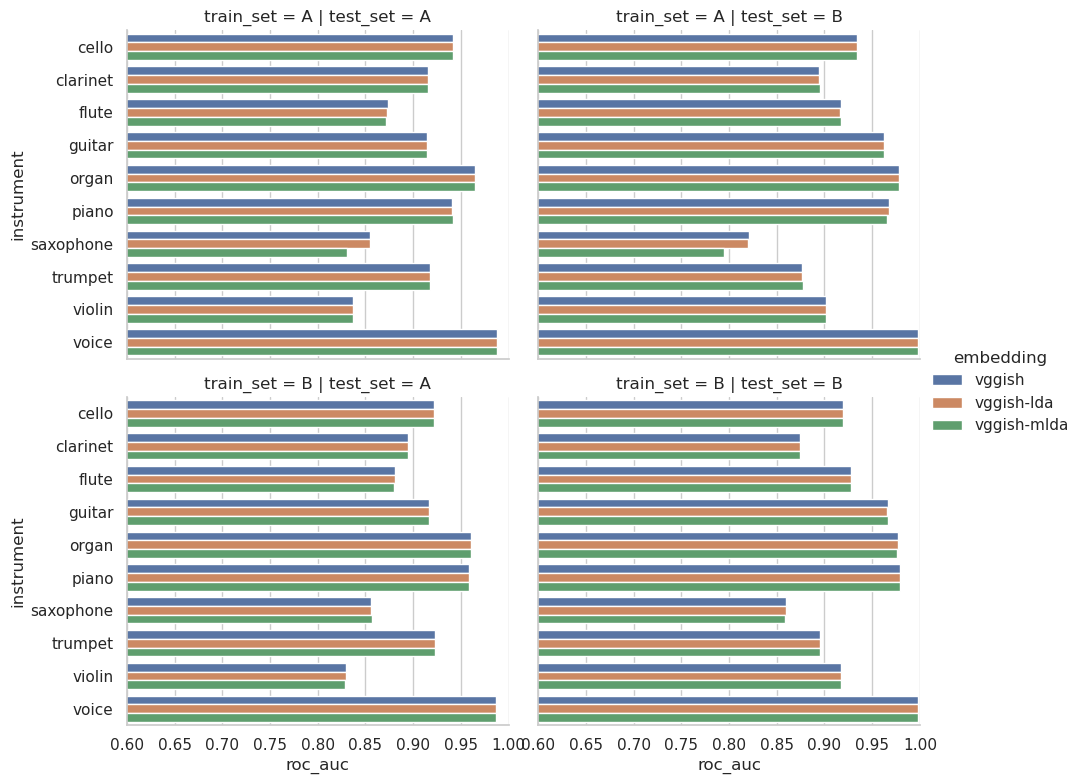

In [ ]:
df = pd.read_csv('results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## OpenL3

In [ ]:
embedding = 'openl3'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid)

A_feature = deb.load_feature(meta_all, 'A')
B_feature = deb.load_feature(meta_all, 'B')

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

100%|██████████| 6705/6705 [00:17<00:00, 384.50it/s]


(6705, 512) (6705,)


100%|██████████| 6705/6705 [00:17<00:00, 385.97it/s]


(6705, 512) (6705,)
Train on A, test on A


100%|██████████| 10/10 [00:47<00:00,  4.76s/it]


Train on A, test on B


100%|██████████| 10/10 [00:47<00:00,  4.79s/it]


Train on B, test on B


100%|██████████| 10/10 [00:44<00:00,  4.47s/it]


Train on B, test on A


100%|██████████| 10/10 [00:44<00:00,  4.49s/it]


In [ ]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

Train on A, test on A


100%|██████████| 10/10 [00:50<00:00,  5.03s/it]


Train on A, test on B


100%|██████████| 10/10 [00:49<00:00,  4.94s/it]


Train on B, test on B


100%|██████████| 10/10 [00:46<00:00,  4.69s/it]


Train on B, test on A


100%|██████████| 10/10 [00:46<00:00,  4.69s/it]


In [ ]:
debias_method = '-mlda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/result_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

Train on A, test on A


100%|██████████| 10/10 [00:53<00:00,  5.32s/it]


Train on A, test on B


100%|██████████| 10/10 [00:53<00:00,  5.35s/it]


Train on B, test on B


100%|██████████| 10/10 [00:49<00:00,  4.97s/it]


Train on B, test on A


100%|██████████| 10/10 [00:50<00:00,  5.02s/it]


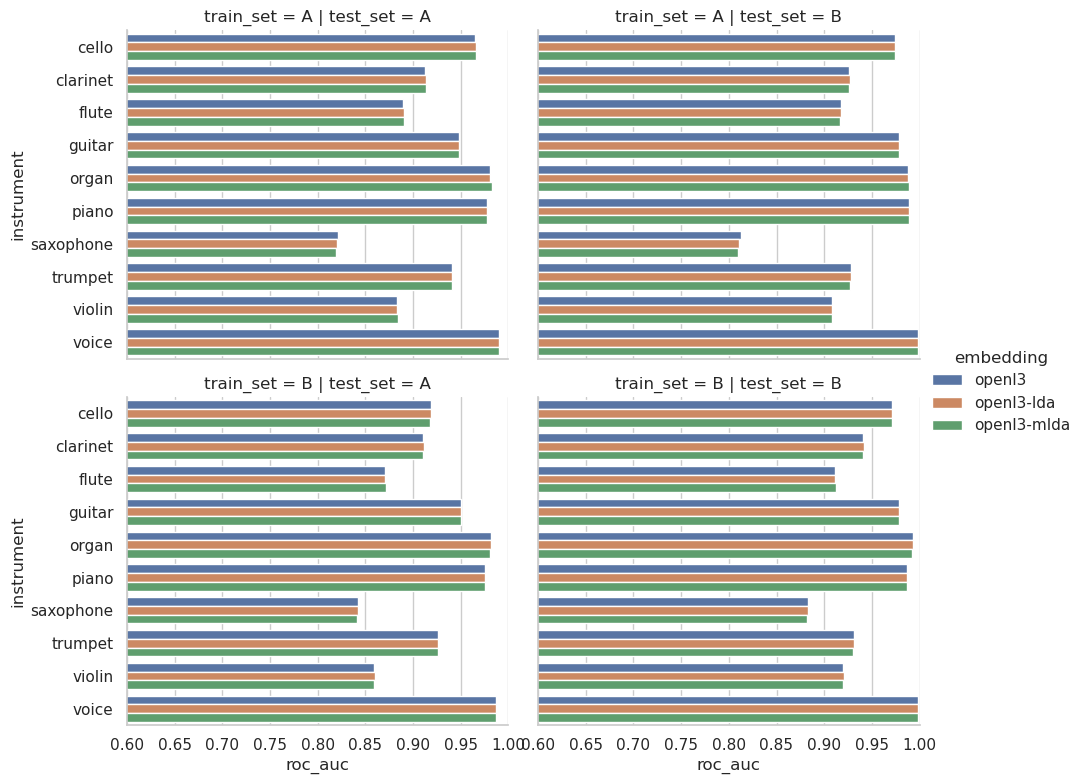

In [ ]:
df = pd.read_csv('results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## YAMNet

In [ ]:
embedding = 'yamnet'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid)

A_feature = deb.load_feature(meta_all, 'A')
B_feature = deb.load_feature(meta_all, 'B')

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

100%|██████████| 6705/6705 [00:03<00:00, 1839.03it/s]


(6705, 1024) (6705,)


100%|██████████| 6705/6705 [00:03<00:00, 1837.45it/s]


(6705, 1024) (6705,)
Train on A, test on A


100%|██████████| 10/10 [00:49<00:00,  4.90s/it]


Train on A, test on B


100%|██████████| 10/10 [00:48<00:00,  4.85s/it]


Train on B, test on B


100%|██████████| 10/10 [00:45<00:00,  4.57s/it]


Train on B, test on A


100%|██████████| 10/10 [00:45<00:00,  4.58s/it]


In [ ]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

In [ ]:
debias_method = '-mlda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/result_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

Train on A, test on A


100%|██████████| 10/10 [01:56<00:00, 11.64s/it]


Train on A, test on B


100%|██████████| 10/10 [01:52<00:00, 11.22s/it]


Train on B, test on B


100%|██████████| 10/10 [01:52<00:00, 11.21s/it]


Train on B, test on A


100%|██████████| 10/10 [02:02<00:00, 12.26s/it]


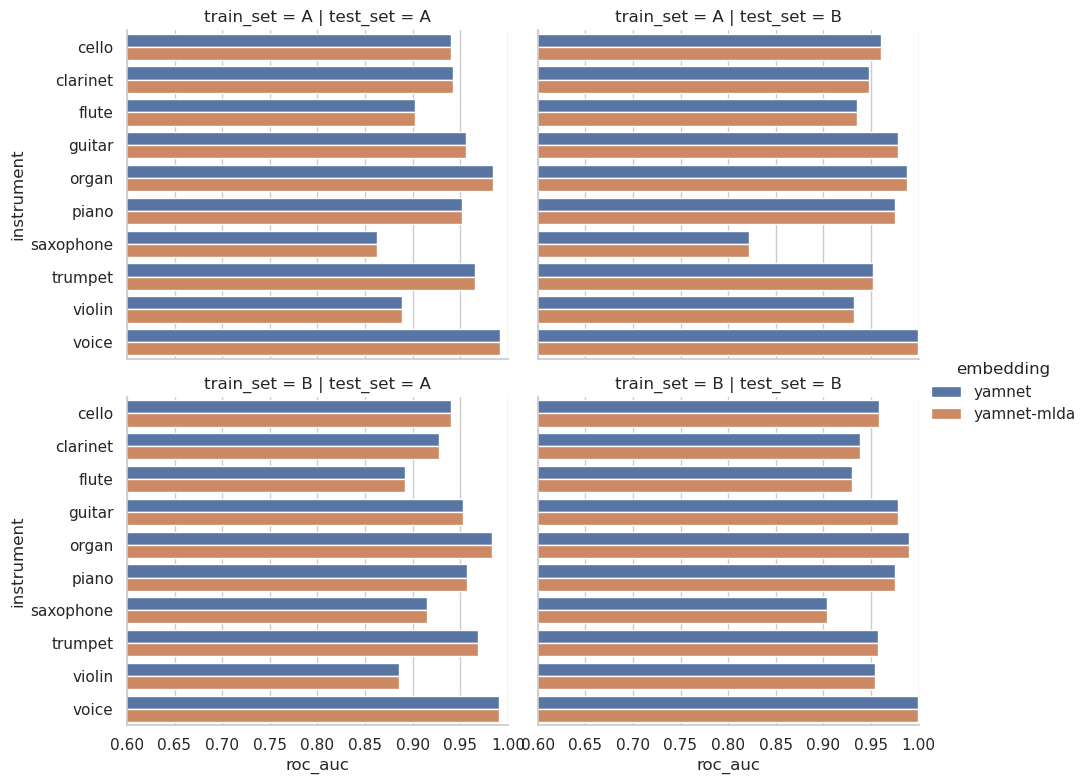

In [ ]:
df = pd.read_csv('results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

In [ ]:
# expected length: 44 * 6 = 264
result_all

,instrument,train_set,test_set,precision,recall,f1-score,support,accuracy,roc_auc,ap,embedding
0,cello,A,A,0.22666666666666666,0.85,0.35789473684210527,40.0,0.8729166666666667,0.9414673913043479,0.5980914757350679,vggish
1,clarinet,A,A,0.27358490566037735,0.8285714285714286,0.4113475177304965,70.0,0.8270833333333333,0.9156179775280899,0.5783301812752966,vggish
2,flute,A,A,0.25,0.7017543859649122,0.3686635944700461,57.0,0.8572916666666667,0.8731324435118805,0.49548234930261903,vggish
3,guitar,A,A,0.6376811594202898,0.7927927927927928,0.7068273092369477,222.0,0.8479166666666667,0.9146707683293049,0.819133354894501,vggish
4,organ,A,A,0.5,0.9076923076923077,0.644808743169399,130.0,0.8645833333333334,0.9650602409638555,0.7962659755393138,vggish
...,...,...,...,...,...,...,...,...,...,...,...
75,piano,B,A,0.6942148760330579,0.8235294117647058,0.7533632286995515,102.0,0.9427083333333334,0.9571049865167512,0.8474245617248205,yamnet-mlda
76,saxophone,B,A,0.32972972972972975,0.7922077922077922,0.46564885496183206,77.0,0.8541666666666666,0.9152534894324249,0.5888577316631333,yamnet-mlda
77,trumpet,B,A,0.4658385093167702,0.8823529411764706,0.6097560975609755,85.0,0.9,0.9683899159663866,0.8422318981837077,yamnet-mlda
78,violin,B,A,0.4095238095238095,0.6323529411764706,0.4971098265895954,68.0,0.909375,0.8856337378000527,0.5884861228423067,yamnet-mlda


In [ ]:
result_all.to_csv('results/result_linear_all.csv', index=False)